In [1]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train[0].shape

(28, 28)

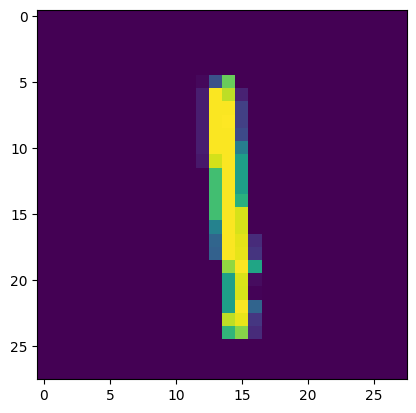

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[8])
plt.show()

<Axes: >

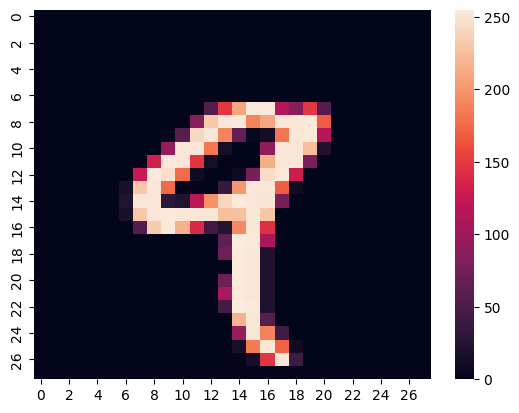

In [5]:
import seaborn as sns
sns.heatmap(X_train[4])

In [6]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(160, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(320, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 14s 5ms/step - loss: 0.3258 - accuracy: 0.9452 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0779 - accuracy: 0.9768 - val_loss: 0.0671 - val_accuracy: 0.9801
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.1023 - val_accuracy: 0.9710
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.1031 - val_accuracy: 0.9739
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0462 - accuracy: 0.9865 - val_loss: 0.0702 - val_accuracy: 0.9808
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0449 - accuracy: 0.9874 - val_loss: 0.0870 - val_accuracy: 0.9786
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0641 - val_accurac

In [10]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9837


[0.1491488218307495, 0.9836999773979187]

In [11]:
Y_pred = model.predict(X_test)
Y_pred[0].argmax()

313/313 [==============================] - 1s 2ms/step


7

<Axes: >

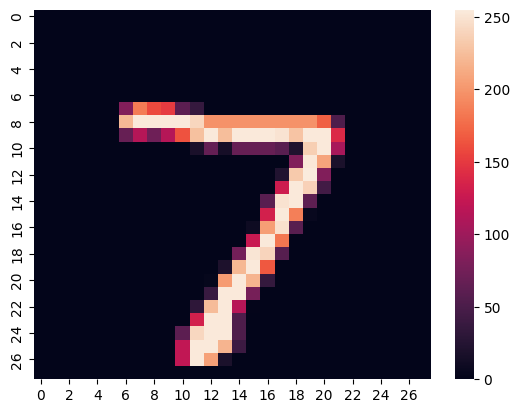

In [12]:
sns.heatmap(X_test[0])

In [17]:
sns.set()
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Axes: >

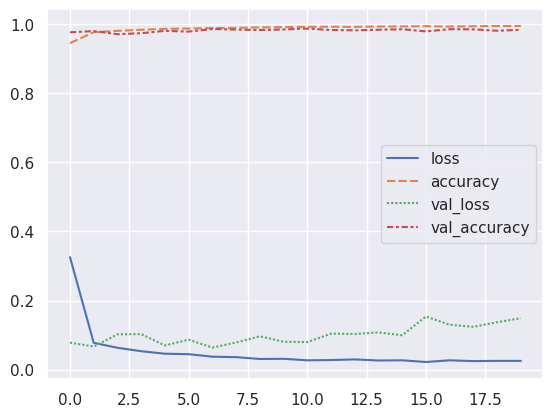

In [32]:
sns.lineplot(data=history.history)